Demonstration of using the bound files.


In [1]:

import numpy as np
from scipy.stats import norm
import polars as pl


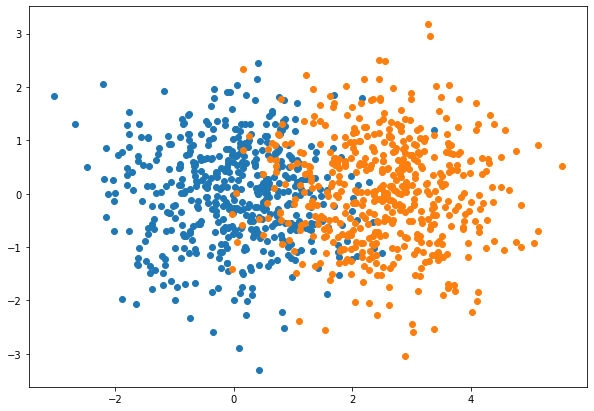

True BER is  0.10027258671155662


In [ ]:
from modules.bounds_calculator import bounds_calculator



dim = 3

diff = 2.56

mean1 = np.zeros(dim)
covariance1 = np.identity(dim)
mean2 = np.zeros(dim)
mean2[0] = diff # set the difference between the two means
covariance2= np.identity(dim)
        
samples = 500

data0 = np.random.multivariate_normal(mean1, covariance1, samples)
data1 = np.random.multivariate_normal(mean2, covariance2, samples)


import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

ax.scatter(data0[:, 0], data0[:, 1])
ax.scatter(data1[:, 0], data1[:, 1])



plt.show()

from scipy.stats import norm

dx = 0.001
x = np.arange(-10, 10 + dx, dx)
# Define the normal distributions
f0 = norm.pdf(x, loc=diff, scale =1)
f1 = norm.pdf(x, loc=0, scale =1)
# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)
print("True BER is ", BER)

Running the bounds

In [3]:

import matlab.engine
eng = matlab.engine.start_matlab()

In [4]:
bounds_calculator(data0, data1, MATLAB = eng)


{'dp_lower': 0.08166998673296222,
 'dp_upper': 0.15000000000000002,
 'Bhattacharyya_lower': 0.052132293231208715,
 'Bhattacharyya_upper': 0.22229376337104914,
 'tight_lower': 0.1396176013031064,
 'tight_upper': 0.14489204876861464,
 'Bha_knn_lower': 0.10027805428383757,
 'Bha_knn_upper': 0.3003703815506537,
 'enDive_lower': 0.0634591041690275,
 'enDive_upper': 0.11886409253418406,
 'influence_lower': 0.04030866123137422,
 'influence_upper': 0.1966821625392311}

In [5]:
eng.quit()